In [1]:
# Imoporting the Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
# Reading the Dataset
dataset = pd.read_csv(r'C:\Users\Kathir\Desktop\NM_Project\Dataset\flightdata.csv')
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
# Handling Missing Values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [4]:
#skip handling the missing values step.
dataset = dataset.drop('Unnamed: 25', axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [5]:
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK",
                   "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [6]:
dataset[dataset.isnull().any(axis=1)].head(10)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
179,86,1,10,7,MSP,DTW,1632,NaN,NaN
184,557,1,10,7,MSP,DTW,912,0.0,NaN
210,1096,1,10,7,DTW,MSP,1303,NaN,NaN
478,1542,1,22,5,SEA,JFK,723,NaN,NaN
481,1795,1,22,5,ATL,JFK,2014,NaN,NaN
491,2312,1,22,5,MSP,JFK,2149,NaN,NaN
499,423,1,23,6,JFK,ATL,1600,NaN,NaN
500,425,1,23,6,JFK,ATL,1827,NaN,NaN
501,427,1,23,6,JFK,SEA,1053,NaN,NaN


In [7]:
dataset['DEP_DEL15'].mode()

0    0.0
Name: DEP_DEL15, dtype: float64

In [8]:
# replace the missing values with 15
datset = dataset.fillna({'ARR_DEL15': 1})
datset = dataset.fillna({'DEP_DEL15': 0})
datset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,NaN
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,NaN


In [9]:
# Handling Cateogrical Values
import math

for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
datset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,2143,0.0,0.0
1,1476,1,1,5,DTW,MSP,1435,0.0,0.0
2,1597,1,1,5,ATL,SEA,1215,0.0,0.0
3,1768,1,1,5,SEA,MSP,1335,0.0,0.0
4,1823,1,1,5,SEA,DTW,607,0.0,0.0


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [11]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [12]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [13]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [14]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [15]:
x

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [16]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z = oh.fit_transform(x[:, 4:5]).toarray()
t = oh.fit_transform(x[:, 5:6]).toarray()

In [17]:
z

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
t

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [19]:
x=np.delete(x,[4, 5], axis=1)

In [20]:
# Descriptive Statistical
dataset = pd.read_csv(r'C:\Users\Kathir\Desktop\NM_Project\Dataset\flightdata.csv')
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


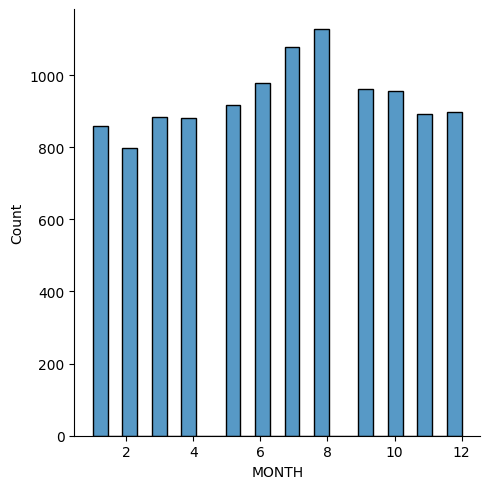

In [21]:
# Univariate Analysis
sns.displot(dataset.MONTH)

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

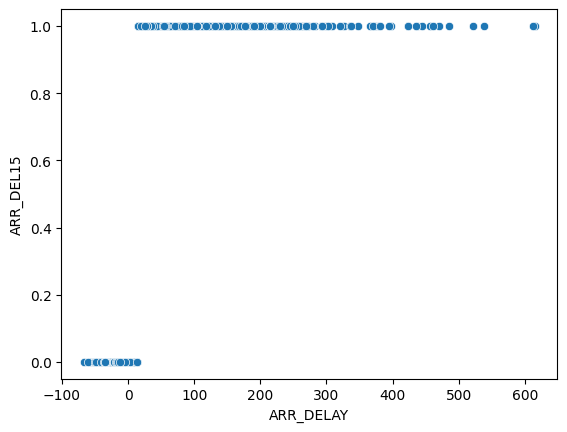

In [22]:
# Bivariate Analysis
sns.scatterplot(x='ARR_DELAY', y='ARR_DEL15', data=dataset)

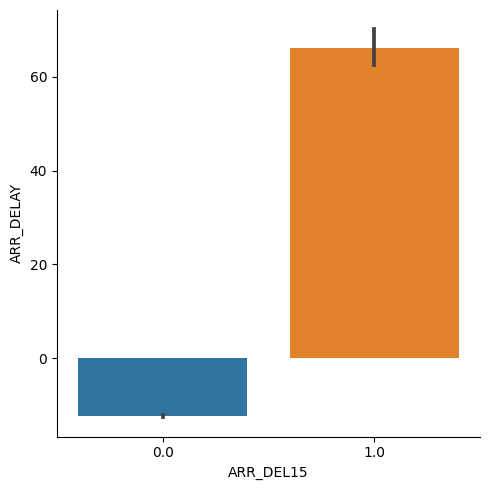

In [23]:
sns.catplot(x='ARR_DEL15', y='ARR_DELAY', kind='bar', data=dataset)

C:\Users\Kathir\AppData\Local\Temp\ipykernel_1520\3487235704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

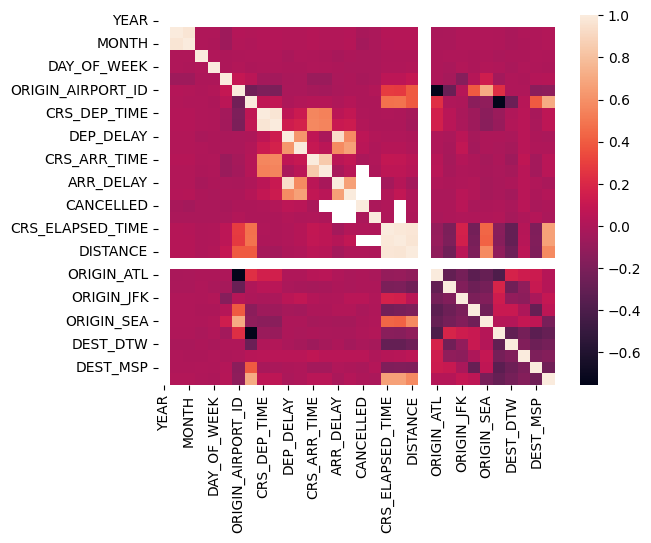

In [31]:
# Multivariate Analysis
sns.heatmap(dataset.corr())

In [25]:
# Splitting data into dependent and independent variables
import pandas as pd
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,...,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,...,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,...,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,...,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,...,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,...,0,0,0,0,1,0,1,0,0,0


In [54]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [55]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [56]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dataset.drop('ARR_DEL15', axis=1), dataset['ARR_DEL15'], test_size=0.2, random_state=0)

In [57]:
x_test.shape

(2247, 8)

In [58]:
x_train.shape

(8984, 8)

In [59]:
y_test.shape

(2247, 1)

In [60]:
y_train.shape

(8984, 1)

In [64]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: 'DL'

In [ ]:
# MODEL BUILDING
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

In [ ]:
DecisionTreeClassifier(random_state=0)

In [ ]:
decisiontree = classifier.predict(x_test)

In [ ]:
decisiontree

In [ ]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test, decisiontree)

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomFoerstClassifier(n_estimators=10, criterion='entropy')

In [ ]:
rfc.fit(x_train, y_train)

In [ ]:
y_predict = rfc.predict(x_test)

In [ ]:
# ANN MODEL
# Importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layer import Dense

In [ ]:
# Creating ANN Skleton view
classification = Sequential()
classification.add(Dense(30, activation='relu'))
classification.add(Dense(128, activation='relu'))
classification.add(Dense(64, activation='relu'))
classification.add(Dense(32, activation='relu'))
classification.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the ANN Model
classification.compile(optimizer='adam', loss='binary_crossentrophy', metrics=['accuracy'])

In [ ]:
# Training the model
classification.fix(x_train, y_train, batch_size=4, validation_split=0.2, epochs=100)

In [ ]:
# Test the model
#Decision Tree
y_pred = classifier.predict([[129, 99, 1, 0, 0,  1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]])
print(y_pred)
(y_pred)

In [ ]:
# RandomForest
y_pred = rfc.predict([[129, 99, 1, 0, 0,  1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]])
print(y_pred)
(y_pred)

In [ ]:
Classification.save('flight.h5')

In [ ]:
# Testing the model
y_pred = classification.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
def predict_exit(sample_value):
    # Convert list to numpy array
    sample_value = np.array(sample_value)
    # Reshape because sample_value contains only one record
    sample_value = sample_value.reshape(1, -1)
    # Feature Scaling
    sample_value = sc.transform(sample_value)
    
    return classifier.predict(sample_value)

In [ ]:
test = classification.predict([[1, 1, 121.000000, 36.0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])
if test == 1:
    print('Prediction: Chance of delay')
else:
    print('Prediction: No chance of delay.')

In [ ]:
# Performance Testing & Hyperparameter Tuning
# Compare The Model
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

In [ ]:
dfs = []
models = [
    ('RF', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('ANN', MLPClassifier())
]
result = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'roc_auc']
target_nmes = ['no delay', 'delay']
for name, model in models:
    kfold = model_selection.kfold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(
        model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)
return final

In [ ]:
# RanomForest Accuracy
print('Training Accuracy: ', accuracy_score(y_train, y_predict_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_predict))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
# Accuracy score of Destination tree
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test, decisiontree)

In [ ]:
desacc

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, decisiontree)

In [ ]:
# Calculate the Accuracy of ANN
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
print('The Accuracy for ANN model is: {}%'.format(score*100))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Comparing Model Accuracy Before & After Applying Hyperparameter Tuning
# Giving some parameters that can be used in randomized search cv
parameter = {
    'n_estimators': [1, 20, 30, 55, 68, 74, 90, 120, 115],
    'criterion': ['gini', 'entropy'],
    'max_features': ["auto", "sqrt", "log2"],
    'max_depth': [2, 5, 8, 10], 'verbose': [1, 2, 3, 4, 6, 8, 9, 10]
}

In [ ]:
# Performing the randomized CV
RCV = RandomizedSearchCV(estimator=rf, param_distributions=parameters, cv=10, n_iter=4)

In [ ]:
RCV.fit(x_train, y_train)

In [ ]:
bt_params

In [ ]:
bt_score

In [ ]:
model = RandomForestClassifier(verbose=10, n_estimators=120, max_features='log2', max_depth=10, criterion='entropy')
RCV.fit(x_train, y_train)

In [ ]:
y_predict_rf = RCV.predict(x_test)

In [ ]:
RFC = accuracy_score(y_test, y_predict_rf)
RFC

In [ ]:
# Model Deployment
# Save the best Model
import pickle
pickle.dump(RCV, open('flight.pkl', '////////wb'))